In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv("E:\\datascience\\stud1.csv")

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [14]:
print("catgories in gender variable:", end=" ")
print(df["gender"].unique())

print("categories in race ethnicity", end="")
print(df["race_ethnicity"].unique())

print("categories in parental level of education",end="")
print(df["parental_level_of_education"].unique())

print("categories in lunch",end="")
print(df["lunch"].unique())

print("categories in test preparation",end="")
print(df["test_preparation_course"].unique())

catgories in gender variable: ['female' 'male']
categories in race ethnicity['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch['standard' 'free/reduced']
categories in test preparation['none' 'completed']


In [22]:
#define categorical and numerical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype  == "O"]

#print columns

print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))

print("\nWe have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [24]:
#adding columns for total score and average score

df["total_score"] = df["math_score"] +df["reading_score"] +df["writing_score"]
df["Average"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_full = df[df["reading_score"]==100]["Average"].count()
writing_full = df[df["writing_score"]==100]["Average"].count()
math_full = df[df["math_score"]==100]["Average"].count()

print(f"number of student with full marks in reading:{reading_full}")
print(f"number of students with full marks in writing:{writing_full}")
print(f"number of students with full marks in math:{math_full}")

number of student with full marks in reading:17
number of students with full marks in writing:14
number of students with full marks in math:7


In [34]:
reading_less_20 =df[df["reading_score"]<=20]["Average"].count()
writing_less_20 = df[df["writing_score"]<=20]["Average"].count()
math_less_20=  df[df["math_score"]<=20]["Average"].count()

print(f"number of student with less than 20 in reading:{reading_less_20}")
print(f"number of students with less than 20 in writing:{writing_less_20}")
print(f"number of students with less than 20 in math:{math_less_20}")

number of student with less than 20 in reading:1
number of students with less than 20 in writing:3
number of students with less than 20 in math:4


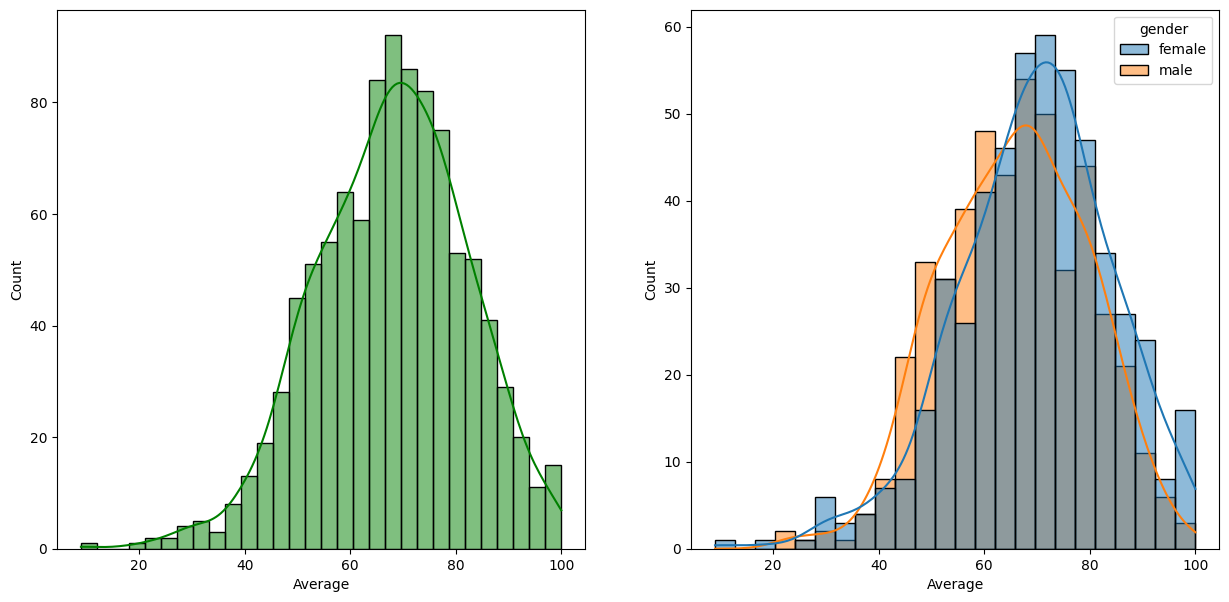

In [38]:
#visualize the avarage score distribution to make some conclusion

fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="Average", bins=30, kde=True,color="g")
plt.subplot(122)
sns.histplot(data = df, x= "Average",kde = True, hue = "gender" )
plt.show()


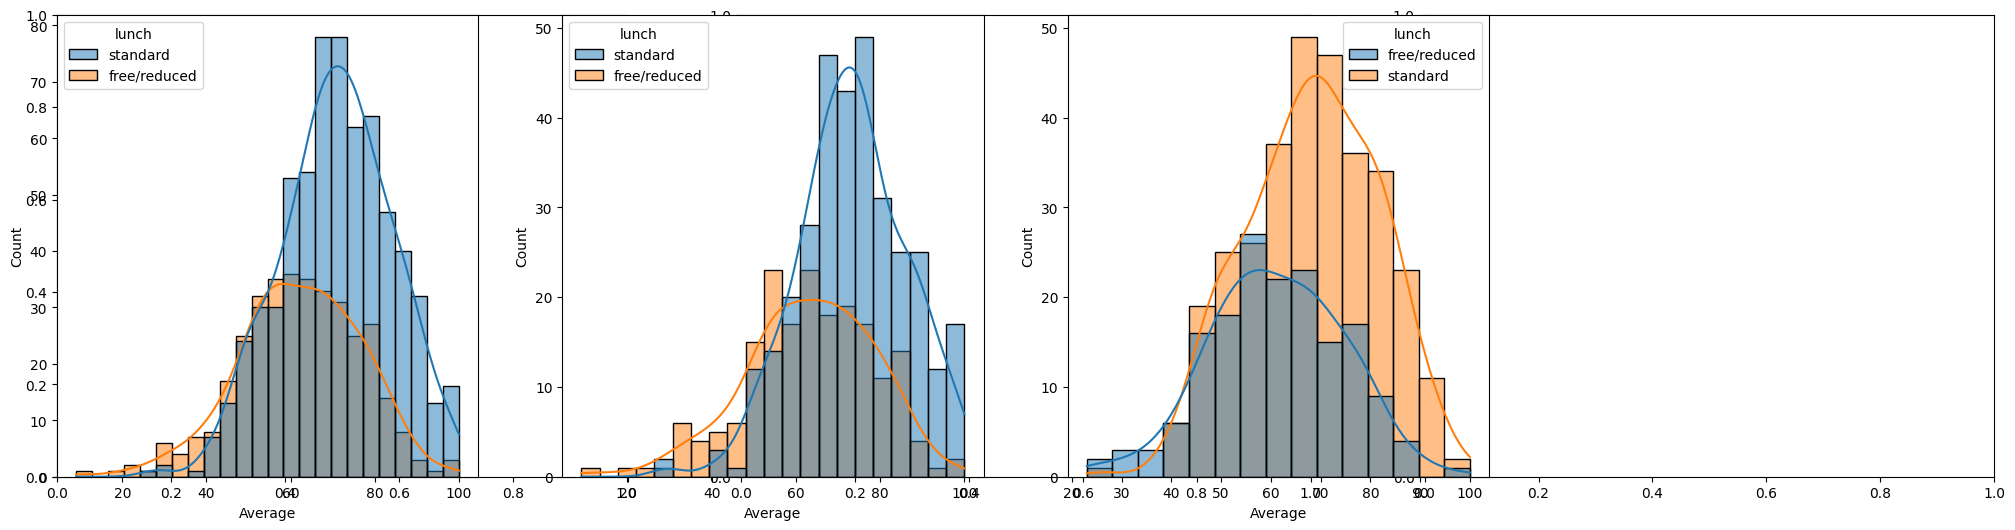

In [39]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x="Average",kde=True, hue="lunch")
plt.subplot(142)
sns.histplot(data = df[df.gender=="female"],x="Average",kde=True,hue = "lunch")
plt.subplot(143)
sns.histplot(data = df[df.gender=="male"],x="Average",kde=True,hue = "lunch")
plt.show()